In [30]:
import keras 
import tensorflow as tf
from keras.datasets import mnist #cargo los datos del mnist
import numpy as np
from keras.callbacks import History 
import matplotlib.pyplot as plt
from numpy import genfromtxt
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator

In [31]:
#cargo datos de cifar
(x_train,y_train),(x_test,y_test) = cifar100.load_data() 
mean = np.mean(x_train,axis=0)
sigma = np.std(x_train,axis=0) 
x_train = (x_train - mean)/sigma
x_test = (x_test - mean)/sigma
yy_test = to_categorical(y_test)
yy_train = to_categorical(y_train)
rg = 1e-4
epocas = 100

In [16]:
#ALEXNET
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(48,(3,3),strides=(1,1),activation='relu',kernel_regularizer=keras.regularizers.l2(rg),input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Conv2D(96,(3,3),strides=(1,1),activation='relu',kernel_regularizer=keras.regularizers.l2(rg),padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Conv2D(192,(3,3),strides=(1,1),activation='relu',kernel_regularizer=keras.regularizers.l2(rg),padding='same')) #original 38
model.add(keras.layers.Conv2D(192,(3,3),strides=(1,1),activation='relu',kernel_regularizer=keras.regularizers.l2(rg),padding='same')) #same
model.add(keras.layers.Conv2D(256,(3,3),strides=(1,1),activation='relu',kernel_regularizer=keras.regularizers.l2(rg),padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(2000, activation='relu',kernel_regularizer=keras.regularizers.l2(rg)))
model.add(keras.layers.Dense(1000, activation='relu',kernel_regularizer=keras.regularizers.l2(rg)))
model.add(keras.layers.Dense(100, activation='linear',kernel_regularizer=keras.regularizers.l2(rg)))
#model.summary()
optimizer = keras.optimizers.SGD(1e-3)
model.compile(optimizer,loss=keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['acc'])
history = model.fit(x_train, yy_train,epochs=epocas,shuffle=True,validation_data=(x_test, yy_test),batch_size=100, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 16s - loss: 5.0293 - acc: 0.0100 - val_loss: 5.0261 - val_acc: 0.0098
Epoch 2/100
 - 15s - loss: 5.0231 - acc: 0.0119 - val_loss: 5.0193 - val_acc: 0.0120
Epoch 3/100
 - 15s - loss: 5.0138 - acc: 0.0151 - val_loss: 5.0069 - val_acc: 0.0160
Epoch 4/100
 - 15s - loss: 4.9945 - acc: 0.0180 - val_loss: 4.9787 - val_acc: 0.0180
Epoch 5/100
 - 15s - loss: 4.9479 - acc: 0.0225 - val_loss: 4.9085 - val_acc: 0.0315
Epoch 6/100
 - 15s - loss: 4.8333 - acc: 0.0465 - val_loss: 4.7490 - val_acc: 0.0567
Epoch 7/100
 - 15s - loss: 4.6238 - acc: 0.0720 - val_loss: 4.5263 - val_acc: 0.0854
Epoch 8/100
 - 15s - loss: 4.4406 - acc: 0.0899 - val_loss: 4.3978 - val_acc: 0.0948
Epoch 9/100
 - 15s - loss: 4.3509 - acc: 0.1065 - val_loss: 4.3361 - val_acc: 0.1056
Epoch 10/100
 - 15s - loss: 4.2807 - acc: 0.1168 - val_loss: 4.2816 - val_acc: 0.1139
Epoch 11/100
 - 15s - loss: 4.2152 - acc: 0.1291 - val_loss: 4.2260 - val_acc: 0.1259
Epoch 12/100


Epoch 96/100
 - 15s - loss: 0.4548 - acc: 0.9979 - val_loss: 6.7480 - val_acc: 0.3400
Epoch 97/100
 - 15s - loss: 0.4546 - acc: 0.9977 - val_loss: 6.6966 - val_acc: 0.3462
Epoch 98/100
 - 15s - loss: 0.4498 - acc: 0.9983 - val_loss: 6.8427 - val_acc: 0.3429
Epoch 99/100
 - 15s - loss: 0.4482 - acc: 0.9986 - val_loss: 6.8602 - val_acc: 0.3462
Epoch 100/100
 - 15s - loss: 0.4674 - acc: 0.9937 - val_loss: 6.9488 - val_acc: 0.3408


Text(0, 0.5, 'Loss')

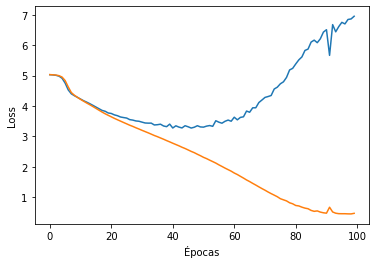

In [17]:
plt.plot(history.history['val_loss'],label='test data')
plt.plot(history.history['loss'],label='train data')
plt.xlabel('Épocas')
plt.ylabel('Loss')
#plt.savefig('ej10_alexnet_2_lossepoch.pdf')

Text(0, 0.5, 'Accuracy')

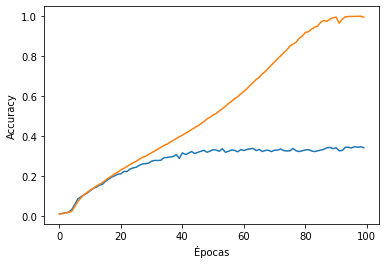

In [18]:
plt.plot(history.history['val_acc'],label='test data')
plt.plot(history.history['acc'],label='train data')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
#plt.savefig('ej10_alexnet_2_accepoch.pdf')

In [20]:
#cifar 100 con aumentacion de datos con alexnet

In [32]:
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )

In [33]:
#cargo datos de cifar
(x_train,y_train),(x_test,y_test) = cifar100.load_data() 
datagen.fit(x_train)
mean = np.mean(x_train,axis=0)
sigma = np.std(x_train,axis=0) 
x_train = (x_train - mean)/sigma
x_test = (x_test - mean)/sigma
yy_test = to_categorical(y_test)
yy_train = to_categorical(y_train)
rg = 1e-3
epocas = 100

In [34]:
#ALEXNET
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(48,(3,3),strides=(1,1),activation='relu',kernel_regularizer=keras.regularizers.l2(rg),input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Conv2D(96,(3,3),strides=(1,1),activation='relu',kernel_regularizer=keras.regularizers.l2(rg),padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Conv2D(192,(3,3),strides=(1,1),activation='relu',kernel_regularizer=keras.regularizers.l2(rg),padding='same')) #original 38
model.add(keras.layers.Conv2D(192,(3,3),strides=(1,1),activation='relu',kernel_regularizer=keras.regularizers.l2(rg),padding='same')) #same
model.add(keras.layers.Conv2D(256,(3,3),strides=(1,1),activation='relu',kernel_regularizer=keras.regularizers.l2(rg),padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(2000, activation='relu',kernel_regularizer=keras.regularizers.l2(rg)))
model.add(keras.layers.Dense(1000, activation='relu',kernel_regularizer=keras.regularizers.l2(rg)))
model.add(keras.layers.Dense(100, activation='linear',kernel_regularizer=keras.regularizers.l2(rg)))
#model.summary()
optimizer = keras.optimizers.SGD(5e-3) #original 1e-2 para cifar100 alexnet
model.compile(optimizer,loss=keras.losses.CategoricalCrossentropy(from_logits=True),metrics=['acc'])
history = model.fit_generator(datagen.flow(x_train, yy_train, batch_size=100),
                    steps_per_epoch = len(x_train) / 100, epochs=100, validation_data=(x_test, yy_test),verbose=2)

Epoch 1/100
 - 19s - loss: 8.8449 - acc: 0.0188 - val_loss: 8.8111 - val_acc: 0.0275
Epoch 2/100
 - 19s - loss: 8.7509 - acc: 0.0308 - val_loss: 8.6466 - val_acc: 0.0463
Epoch 3/100
 - 19s - loss: 8.4533 - acc: 0.0598 - val_loss: 8.2451 - val_acc: 0.0772
Epoch 4/100
 - 20s - loss: 8.1708 - acc: 0.0823 - val_loss: 8.0589 - val_acc: 0.0987
Epoch 5/100
 - 19s - loss: 8.0159 - acc: 0.1011 - val_loss: 7.9066 - val_acc: 0.1198
Epoch 6/100
 - 19s - loss: 7.8840 - acc: 0.1163 - val_loss: 7.7730 - val_acc: 0.1315
Epoch 7/100
 - 19s - loss: 7.7473 - acc: 0.1340 - val_loss: 7.6412 - val_acc: 0.1516
Epoch 8/100
 - 19s - loss: 7.6161 - acc: 0.1494 - val_loss: 7.5390 - val_acc: 0.1587
Epoch 9/100
 - 19s - loss: 7.4943 - acc: 0.1636 - val_loss: 7.3660 - val_acc: 0.1955
Epoch 10/100
 - 19s - loss: 7.3760 - acc: 0.1776 - val_loss: 7.2852 - val_acc: 0.1959
Epoch 11/100
 - 18s - loss: 7.2614 - acc: 0.1926 - val_loss: 7.2279 - val_acc: 0.2017
Epoch 12/100
 - 19s - loss: 7.1596 - acc: 0.2055 - val_loss: 7.

Epoch 97/100
 - 19s - loss: 2.7972 - acc: 0.7686 - val_loss: 4.9373 - val_acc: 0.4197
Epoch 98/100
 - 19s - loss: 2.7549 - acc: 0.7770 - val_loss: 5.0397 - val_acc: 0.4199
Epoch 99/100
 - 18s - loss: 2.7270 - acc: 0.7842 - val_loss: 4.8716 - val_acc: 0.4347
Epoch 100/100
 - 18s - loss: 2.6937 - acc: 0.7882 - val_loss: 5.0264 - val_acc: 0.4305


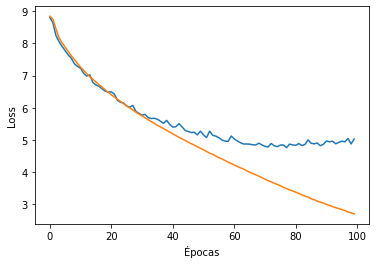

In [36]:
plt.plot(history.history['val_loss'],label='test data')
plt.plot(history.history['loss'],label='train data')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.savefig('ej10_alexnet_cifar100_lossepoch_aug.pdf')

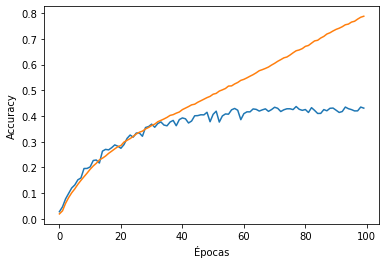

In [37]:
plt.plot(history.history['val_acc'],label='test data')
plt.plot(history.history['acc'],label='train data')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.savefig('ej10_alexnet_cifar100_accepoch_aug.pdf')